# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
import os
import pandas as pd
import seaborn as sns
import pickle

import tensorflow as tf
from tensorflow import keras
from keras import metrics


from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# importing the data into google drive from website
only need to run once


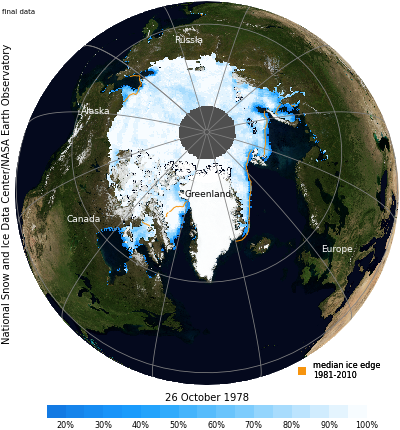

In [ ]:
im = Image.open(requests.get('https://noaadata.apps.nsidc.org/NOAA/G02135/north/daily/images/1978/10_Oct/N_19781026_conc_blmrbl_v3.0.png', stream = True).raw)
im

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
years = np.arange(1980, 2024)
months = {'Jan':'01', 'Feb':'02', 'Mar':'03', 'Apr':'04', 'May':'05', 'Jun':'06', 'Jul':'07', 'Aug':'08', 'Sep':'09', 'Oct':'10', 'Nov':'11', 'Dec':'12'}
days = [f'{i:02d}' for i in np.arange(1, 32)]


In [ ]:
def download_images(years, months, days):
  url = 'https://noaadata.apps.nsidc.org/NOAA/G02135/north/daily/images/'

  for year in years:
    path = '/content/drive/My Drive/207_data/'
    path_yr = os.path.join(path, str(year))
    if os.path.exists(path_yr) == False:
      os.mkdir(path_yr)
    for month in months:
      url_mth = f"{url}{year}/{months[month]}_{month}/"
      get_code = requests.get(url_mth)
      if get_code.status_code == 200:
        path_mth = os.path.join(path_yr, month)
        if os.path.exists(path_mth) == False:
          os.mkdir(path_mth)
        for day in days:
          im_name = f"{year}_{int(months[month])}_{int(day)}.png"
          path_day = os.path.join(path_mth, im_name)
          if os.path.isfile(path_day) == False:
            url_day = f"{url_mth}N_{year}{months[month]}{day}_conc_blmrbl_v3.0.png"
            get_code = requests.get(url_day)
            if get_code.status_code == 200:
              im_name = f"{year}_{int(months[month])}_{int(day)}.png"
              path_day = os.path.join(path_mth, im_name)
              im = Image.open(requests.get(url_day, stream = True).raw)
              im.save(path_day)

In [ ]:
years = [1984, 1985, 1986]
download_images(years, months, days)

FileNotFoundError: ignored

In [ ]:
years = [1987, 1988, 1989]
download_images(years, months, days)

FileNotFoundError: ignored

In [ ]:
years = np.arange(1990, 1992)
download_images(years, months, days)

FileNotFoundError: ignored

In [ ]:
years = np.arange(1992, 1996)
download_images(years, months, days)

In [ ]:
years = np.arange(1996, 2001)
download_images(years, months, days)

In [ ]:
years = np.arange(2002, 2006)
download_images(years, months, days)

ConnectTimeout: ignored

In [ ]:
years = np.arange(2005, 2009)
download_images(years, months, days)

In [ ]:
years = np.arange(2009, 2013)
download_images(years, months, days)

In [ ]:
years = np.arange(2013, 2017)
download_images(years, months, days)

In [ ]:
years = np.arange(2017, 2021)
download_images(years, months, days)

In [ ]:
years = np.arange(2021, 2024)
download_images(years, months, days)

# data analysis and visualizations (testing)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


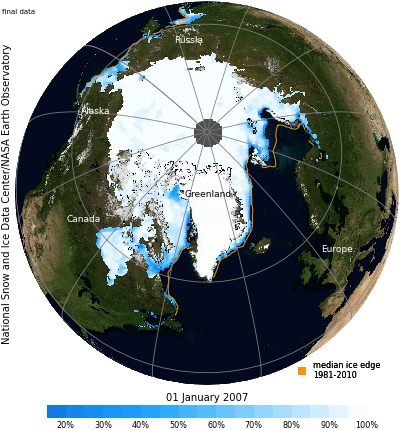

In [ ]:
im = Image.open('/content/drive/My Drive/207_data/2007/Jan/2007_1_1.png')
im

In [ ]:
im.size

(400, 430)

In [ ]:
print(np.array(im.convert('RGB').getdata()))

[[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [255 255 255]
 [255 255 255]
 [255 255 255]]


(338, 280, 4)


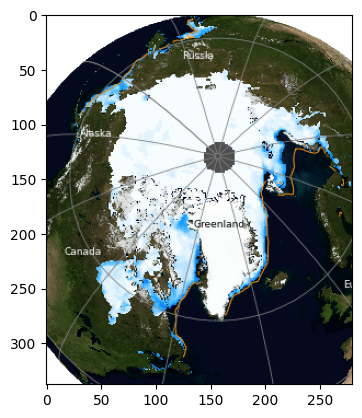

In [ ]:
pix = np.array(im.getdata())
pix2 = np.reshape(pix, (430, 400, 4))

pix3 = pix2[2:340, 50:330]
print(pix3.shape)
plt.imshow(pix3)
plt.show()

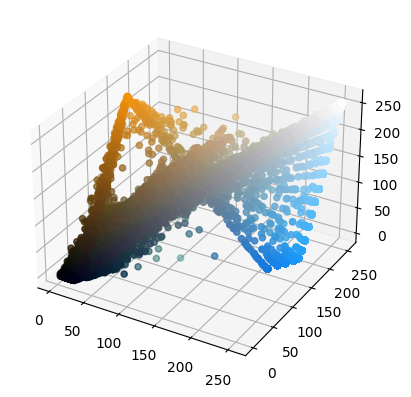

In [ ]:
# print(pix3[:,:,:-1])

scatter_dat = np.rot90(np.reshape(pix3, (94640, 4)))
# colors = np.reshape(pix3[:,:,:-1], (94640, 3))
colors = np.reshape(pix3, (94640, 4))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(scatter_dat[1], scatter_dat[2], scatter_dat[3], c=colors/255.0)

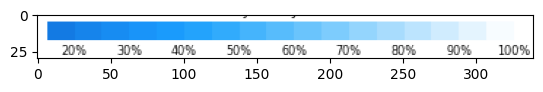

,0,1,2,3,percent
0,19,122,227,255,20
1,22,132,235,255,25
2,23,140,242,255,30
3,25,148,249,255,35
4,26,155,252,255,40
5,35,163,252,255,45
6,49,171,252,255,50
7,69,180,252,255,55
8,87,188,252,255,60
9,106,196,252,255,65


In [ ]:
# find sea ice concentration values
pix4 = pix2[400:430, 40:380]
plt.imshow(pix4)
plt.show()

df_sc_color = pd.DataFrame(data=pix4[15])
df_sc_color = df_sc_color.drop_duplicates()
df_sc_color = df_sc_color.drop([0])

percent_list = np.arange(20, 101, 5)

df_sc_color['percent'] = percent_list
df_sc_color = df_sc_color.reset_index(drop=True)
df_sc_color

In [ ]:
sic_color_mapping_np = df_sc_color.to_numpy()
np.save('/content/drive/My Drive/207_data/saved_data/sic_mapping.npy', sic_color_mapping_np)

In [ ]:
df_sc_color[[0, 1, 2, 3]].values

numpy.ndarray

In [ ]:
list_ex = pix3[100]


list_mst = df_sc_color[[0, 1, 2, 3]].values.tolist()


print(list_mst)
# print(np.where(list(list_ex[100].tolist() == plist for plist in list_mst))[0])

[[19, 122, 227, 255], [22, 132, 235, 255], [23, 140, 242, 255], [25, 148, 249, 255], [26, 155, 252, 255], [35, 163, 252, 255], [49, 171, 252, 255], [69, 180, 252, 255], [87, 188, 252, 255], [106, 196, 252, 255], [125, 204, 253, 255], [148, 213, 253, 255], [168, 220, 253, 255], [188, 228, 254, 255], [208, 236, 254, 255], [228, 244, 254, 255], [247, 252, 255, 255]]


In [ ]:
flatten_pix = pix3.reshape(94640, 4)

sc_image_np = []
for pixel_to_search in flatten_pix:
  df_idx = np.where(list(pixel_to_search.tolist() == plist for plist in list_mst))[0]
  if df_idx.size == 0:
    percent = 0
  else:
    percent = df_sc_color['percent'].iloc[df_idx].values[0]
  sc_image_np.append(percent)

In [ ]:
pix3.shape[0:2]
sc_image_np = np.reshape(sc_image_np, pix3.shape[0:2])
sc_image_np

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<Axes: >

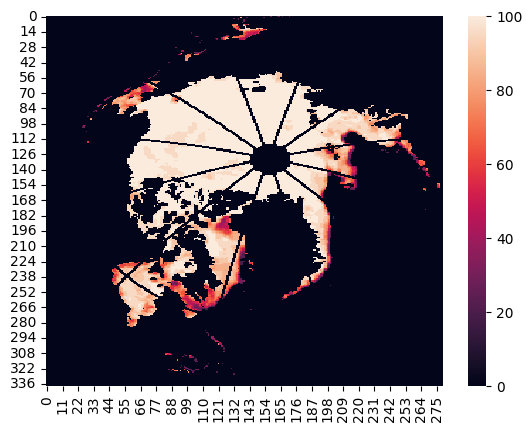

In [ ]:
sns.heatmap(sc_image_np)

In [ ]:
df_idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [ ]:
df_sc_color['percent'].iloc[16]

100

# Image Processing Functions

In [2]:
# generate a list of dates
def generate_dates(dates_list, num_dates):
  """
  take in number of dates to create
  return list of year, month, days

  """

  # dates_data = pd.read_csv('/content/drive/My Drive/207_data/saved_data/N_seaice_extent_daily_v3.0.csv', usecols = [0, 1, 2], header = 0, skiprows = 1, names = ['Year', 'Month', 'Day'])
  dates_data = dates_list

  dates_sample = dates_data.sample(n=num_dates, random_state = 0)

  return dates_sample


In [16]:
# dictionary for producing month numbers
months = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}


# define path
path = '207_data/'

# call images from google folder and create list of input image data
def open_images(list_dates):
  """
  take list of generated dates
  crop images to clean data
  return array of image data

  """
  image_data = []

  for i in list_dates.index:
    year = str(list_dates['Year'][i])
    month_num = list_dates['Month'][i]
    month = months[month_num]
    day = list_dates['Day'][i]
    file_name = f"{year}_{month_num}_{day}.png"

    im = Image.open(os.path.join(path, year, month, file_name))
    im_dat = np.array(im.convert('RGB').getdata())
    im_dat = np.reshape(im_dat, (430, 400, 3))
    im_dat = im_dat[2:340, 50:330]

    image_data.append(im_dat)

  image_data = np.reshape(image_data, (len(image_data), 338, 280, 3))
  return image_data


In [6]:
# create a dataframe of reference colors for sea ice concentration percentage
sic_color_mapping = np.load('207_data/saved_data/sic_mapping.npy')

sic_color_mapping = np.concatenate((sic_color_mapping[:, :3], sic_color_mapping[:, -1:]), axis=1)

sic_color_df = pd.DataFrame(sic_color_mapping, columns = ["Red", "Green", "Blue", "Percent"])

# create a reference list from data frame records
list_mst = sic_color_df[['Red', 'Green', 'Blue']].values.tolist()

# sea ice concentration image array
def sic_output(x_data):
  """
  take list of image data with 3 channels
  return list of sea ice concentration image arrays

  """
  sic_images_arr = []

  for i in range(x_data.shape[0]):
    flattened_pix = x_data[i].reshape(94640, 3)

    sc_image = []

    for pixel_to_search in flattened_pix:
      df_idx = np.where(list(pixel_to_search.tolist() == plist for plist in list_mst))[0]
      if df_idx.size == 0:
        percent = 0
      else:
        percent = sic_color_df['Percent'].iloc[df_idx].values[0]
      sc_image.append(percent)

    sc_image = np.reshape(sc_image, (338, 280))

    sic_images_arr.append(sc_image)

  sic_images_arr = np.reshape(sic_images_arr, (len(sic_images_arr), 338, 280))

  return sic_images_arr


In [ ]:
# calculate mse

def calculate_mse(y_pred, y_true):

  mse = np.array([])

  for i in range(y_pred.shape[0]):

    flatten_pred = np.reshape(y_pred[i], (94640))
    flatten_true = np.reshape(y_true[i], (94640))

    mse_for_image = np.average(np.square(np.subtract(flatten_true, flatten_pred)))

    mse = np.append(mse, mse_for_image)

  mse_overall = np.average(mse)

  return mse_overall


In [ ]:
# baseline average model

def baseline_average(output_data):

  average_sic_val = np.average(output_data)
  flat_bl_np = np.repeat(average_sic_val, 94640)

  bl_image = np.reshape(flat_bl_np, (338, 280))

  return bl_image


# Visualizations for midterm presentation

In [ ]:
# 3d color scatterplot
def color_scatter(x_data, title):
  """
  take an image array
  return plt scatterplot

  """
  scatter_dat = np.rot90(np.reshape(x_data, (94640, 3)))
  colors = np.reshape(x_data, (94640, 3))

  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  ax.scatter3D(scatter_dat[0], scatter_dat[1], scatter_dat[2], c=colors/255.0)
  ax.set_title(title)



In [ ]:
# sea ice concentration heatmap
def sic_heatmap(sic_matrix, title):
  """
  take an sic array
  return sns heatmap

  """
  sns.heatmap(sic_matrix, xticklabels = False, yticklabels=False)
  plt.title(title, fontweight = "bold")



In [ ]:
# sea ice concentration histogram

def sic_hist(sic_data, title):

  hist_data = np.reshape(sic_data, (94640))
  plt.hist(hist_data, color = 'red')
  plt.title(title)

In [ ]:
sample = generate_dates(1000)

dates_train = sample[0:900]
dates_test = sample[900:]

x_train = open_images(dates_train)

sic_images_tr = sic_output(x_train)

bl_mod_pred = baseline_average(sic_images_tr)

bl_mod_pred_tr = np.reshape(np.repeat(bl_mod_pred, 900), (900, 338, 280))

mse_tr = calculate_mse(bl_mod_pred_tr, sic_images_tr)
print(mse_tr)

1176.446026414634


In [ ]:
x_test = open_images(dates_test)

sic_images_ts = sic_output(x_test)

In [ ]:
bl_mod_pred_ts = np.reshape(np.repeat(bl_mod_pred, 100), (100, 338, 280))

mse_ts = calculate_mse(bl_mod_pred_ts, sic_images_ts)
print(mse_ts)

1198.6295315880109


 Model| MSE
-|-
Training| 1176.45
Testing | 1198.63

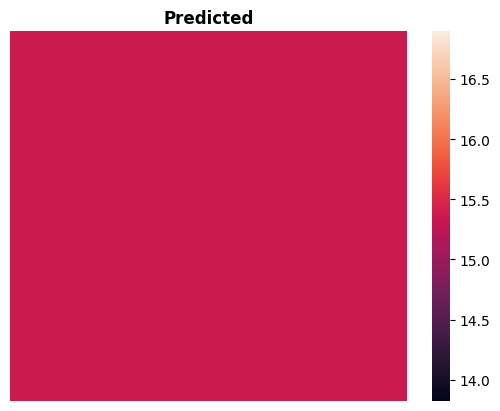

In [ ]:
sic_heatmap(bl_mod_pred, "Predicted")

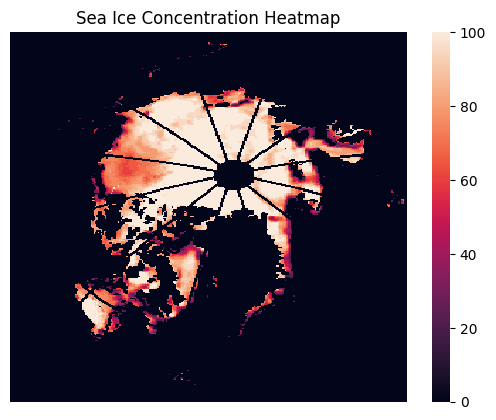

In [ ]:
sic_heatmap(sic_images_tr[0], "Sea Ice Concentration Heatmap")

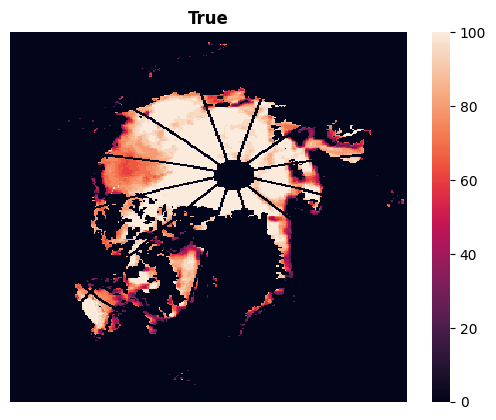

In [ ]:
sic_heatmap(sic_images_tr[0], "True")

Text(0.5, 1.0, 'Satellite Sea Ice Image')

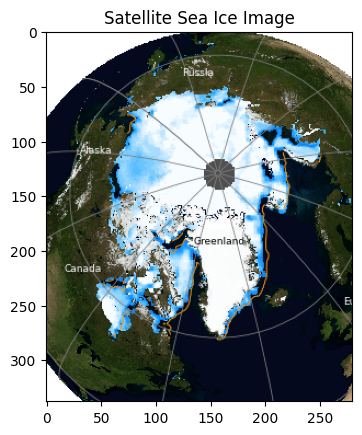

In [ ]:
plt.imshow(x_train[0])
plt.title("Satellite Sea Ice Image")

Text(0.5, 1.0, 'Original Data')

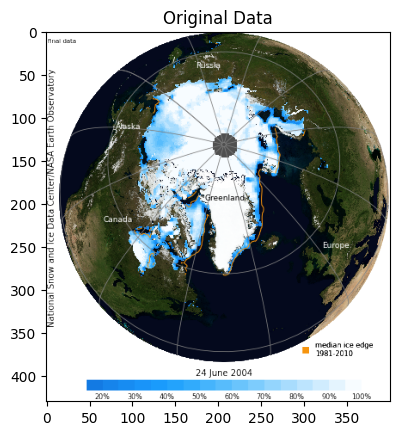

In [ ]:
plt.imshow(Image.open('/content/drive/My Drive/207_data/2004/Jun/2004_6_24.png'))
plt.title("Original Data")

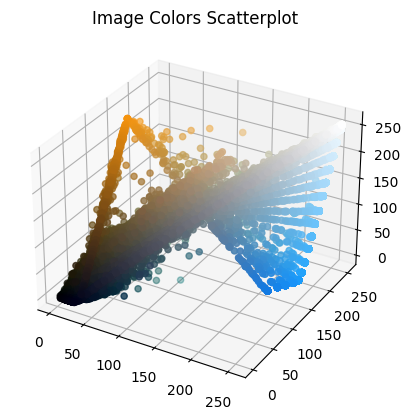

In [ ]:
color_scatter(x_train[0], "Image Colors Scatterplot")

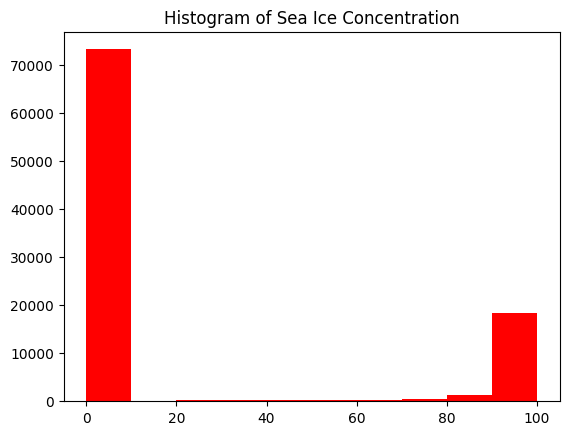

In [ ]:
sic_hist(sic_images_tr[1], "Histogram of Sea Ice Concentration")

Text(0.5, 1.0, 'Number of Daily Observations Taken per Year')

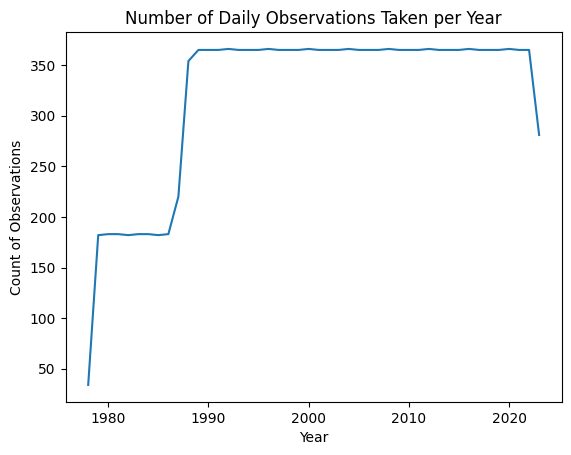

In [ ]:
# dates histogram



dates_data = pd.read_csv('/content/drive/My Drive/207_data/saved_data/N_seaice_extent_daily_v3.0.csv',
                          usecols = [0, 1, 2], header = 0, skiprows = 1, names = ['Year', 'Month', 'Day'])


dates_2 = dates_data.groupby(['Year'])['Year'].count()

plt.plot(dates_2.index, dates_2.values)
plt.xlabel("Year")
plt.ylabel("Count of Observations")
plt.title("Number of Daily Observations Taken per Year")

In [ ]:
np.save('/content/drive/My Drive/207_data/midterm_pres_data/im_with_colors_train.npy', x_train)
np.save('/content/drive/My Drive/207_data/midterm_pres_data/im_with_colors_test.npy', x_test)
np.save('/content/drive/My Drive/207_data/midterm_pres_data/sic_train.npy', sic_images_tr)
np.save('/content/drive/My Drive/207_data/midterm_pres_data/sic_test.npy', sic_images_ts)
np.save('/content/drive/My Drive/207_data/midterm_pres_data/bl_mod_pred.npy', bl_mod_pred)

In [ ]:
x_train = np.load('/content/drive/My Drive/207_data/midterm_pres_data/im_with_colors_train.npy')
x_train.shape



(900, 338, 280, 3)

In [ ]:
dates_data = pd.read_csv('/content/drive/My Drive/207_data/saved_data/N_seaice_extent_daily_v3.0.csv', usecols = [0, 1, 2], header = 0, skiprows = 1, names = ['Year', 'Month', 'Day'])

In [ ]:
train_dat_time_series = dates_data.iloc[5000:6365]


all_images = open_images(train_dat_time_series)

np.save('/content/drive/My Drive/207_data/midterm_pres_data/lin_reg_im_dat.npy', all_images)

sic_labeled_images = sic_output(all_images[365:])

np.save('/content/drive/My Drive/207_data/midterm_pres_data/lin_reg_sic_im.npy', sic_labeled_images)
# sic_images_tr = sic_output(x_train)

# bl_mod_pred = baseline_average(sic_images_tr)

# bl_mod_pred_tr = np.reshape(np.repeat(bl_mod_pred, 900), (900, 338, 280))

# mse_tr = calculate_mse(bl_mod_pred_tr, sic_images_tr)

In [ ]:
all_images[900:1000].shape

(100, 338, 280, 3)

In [ ]:
all_images = np.load('/content/drive/My Drive/207_data/midterm_pres_data/lin_reg_im_dat.npy')
sic_labeled_images = np.load('/content/drive/My Drive/207_data/midterm_pres_data/lin_reg_sic_im.npy')

In [ ]:
x_train = np.reshape(all_images[:900], (85176000, 3))
x_test =  np.reshape(all_images[900:1000], (9464000, 3))

y_train = sic_labeled_images[:900].flatten()
y_test = sic_labeled_images[900:].flatten()

In [ ]:
lin_reg_mod = build_mod_lin_reg()

In [ ]:
history = lin_reg_mod.fit(
  x = x_train[:94640]/255,
  y = y_train[:94640]/100,
  # validation_split=0.1,  # use 10% of the examples as a validation set
  epochs=5,
  batch_size=35,
  verbose=0
  )

# Convert the return value into a DataFrame so we can see the loss after each
# epoch. The history includes training data loss ('loss') and validation data
# loss ('val_loss').
history = pd.DataFrame(history.history)
display(history)

,loss
0,0.817415
1,0.088439
2,0.085753
3,0.084377
4,0.083948


In [ ]:
test_pred = lin_reg_mod.predict(x_train[:94640]/255)

2958/2958 [==============================] - 11s 4ms/step


In [ ]:
lin_reg_mod.evaluate( x_train[:94640]/255, y_train[:94640]/100)

2958/2958 [==============================] - 5s 2ms/step - loss: nan


nan

# Models
**if you are reading in data from google drive, code from image processing fuctions section is necessary. Some processed data is loaded into midterm_pres_data folder in google drive already**

In [28]:
# build regression model

def build_mod_lin_reg():
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  model = tf.keras.Sequential()

  model.add(tf.keras.layers.Dense(
      units=1,                     # output dim
      input_shape=[3, ],  # input dim
      use_bias=True,               # use a bias (intercept) param
      kernel_initializer=tf.ones_initializer,  # initialize params to 1
      bias_initializer=tf.ones_initializer,    # initialize bias to 1
  ))

  optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

  model.compile(loss='mse', optimizer=optimizer)
  return model


In [36]:
# build decision tree regression
def build_dt_mod():
  """
  build a regression tree
  """

  regressor = DecisionTreeRegressor(max_depth = 10, random_state=0)

  return regressor

In [ ]:
# build ANN

def build_ann():
  """
  add hidden layer to regression model
  """

In [7]:
# csv of valid dates from NOAA website

dates_data = pd.read_csv('207_data/saved_data/N_seaice_extent_daily_v3.0.csv', usecols = [0, 1, 2], header = 0, skiprows = 1, names = ['Year', 'Month', 'Day'])

In [24]:
# check for missing files from download

for i in train_inputs.index:
    year = str(train_inputs['Year'][i])
    month_num = train_inputs['Month'][i]
    month = months[month_num]
    day = train_inputs['Day'][i]
    file_name = f"{year}_{month_num}_{day}.png"

    file_path = os.path.join('207_data', year, month, file_name)
    
    if os.path.exists(file_path) == False:
        print(file_path)

207_data\2010\Nov\2010_11_28.png
207_data\2010\Nov\2010_11_17.png
207_data\2010\Nov\2010_11_30.png
207_data\2007\Dec\2007_12_9.png
207_data\2010\Nov\2010_11_21.png
207_data\2010\Nov\2010_11_27.png
207_data\2010\Nov\2010_11_26.png


In [26]:
for i in train_sic_dates_sorted.index:
    year = str(train_sic_dates_sorted['Year'][i])
    month_num = train_sic_dates_sorted['Month'][i]
    month = months[month_num]
    day = train_sic_dates_sorted['Day'][i]
    file_name = f"{year}_{month_num}_{day}.png"

    file_path = os.path.join('207_data', year, month, file_name)
    
    if os.path.exists(file_path) == False:
        print(file_path)

207_data\1994\Jan\1994_1_13.png


In [14]:
# randomly select images from non-recent data for training

train_inputs = generate_dates(dates_data.iloc[:-2961], 3500) # need to change to 3500 for training to randonly select (save 1500 most recent images for testing for 5000 total)
train_sic_transform = train_inputs[['Month', 'Day']]
train_sic_transform['Year'] = train_inputs['Year'] + 4


intersection = pd.merge(train_inputs, train_sic_transform, on = ['Year', 'Month', 'Day'])

train_inputs_im_only = pd.concat([train_inputs, intersection]).drop_duplicates(keep=False)
train_inputs_im_only

train_inputs_sic_only = pd.concat([train_sic_transform, intersection]).drop_duplicates(keep=False)
train_inputs_sic_only

train_inputs_sorted = train_inputs.sort_values(by =['Year', 'Month', 'Day'])
train_sic_dates_sorted = train_sic_transform.sort_values(by =['Year', 'Month', 'Day'])

In [34]:
# images paired with image data for date 4 years in the future so reserved period for testing is 1500 days + 4 years (2961 days total)
test_dates = dates_data.iloc[-2961:]

# Oct 7, 2023 has not yet been uploaded, so drop from training data
test_dates_im = test_dates[:1500].drop([13305])
test_dates_sic = test_dates[1461:].drop([14766])

In [ ]:
print(test_dates_im.shape)
print(test_dates_sic.shape)

(1499, 3)
(1499, 3)


In [ ]:
# save 1/5 training dataset
train_im_dat = open_images(train_inputs_sorted.iloc[:700])

np.save('/content/drive/My Drive/207_data/midterm_pres_data/im_dat_5000_1-5.npy', train_im_dat)

train_sic_im = open_images(train_sic_dates_sorted[:700])
train_sic_y = sic_output(train_sic_im)

np.save('/content/drive/My Drive/207_data/midterm_pres_data/sic_dat_5000_1-5.npy', train_sic_y)

In [ ]:
# load 1/5 processed training images
train_im_dat = np.load('/content/drive/My Drive/207_data/midterm_pres_data/im_dat_5000_1-5.npy')
train_sic_y = np.load('/content/drive/My Drive/207_data/midterm_pres_data/sic_dat_5000_1-5.npy')

In [27]:
# save 3500 training images

train_im_dat = open_images(train_inputs_sorted)

np.save('207_data/saved_data/im_dat_5000.npy', train_im_dat)

train_sic_im = open_images(train_sic_dates_sorted)
train_sic_y = sic_output(train_sic_im)

np.save('207_data/saved_data/sic_dat_5000.npy', train_sic_y)



In [31]:
# normalize and reshape into flattened numpy
# each row in data represents one pixel

x_train = np.reshape(train_im_dat/255, (331240000, 3))
y_train = train_sic_y.flatten()

In [11]:
lin_reg_mod = build_mod_lin_reg()

In [32]:
history = lin_reg_mod.fit(
  x = x_train,
  y = y_train
  # validation_split=0.1,  # use 10% of the examples as a validation set
  # epochs=5,
  # batch_size=35,
  # verbose=0
  )

# Convert the return value into a DataFrame so we can see the loss after each
# epoch. The history includes training data loss ('loss') and validation data
# loss ('val_loss').
history = pd.DataFrame(history.history)
display(history)

10351250/10351250 [==============================] - 5755s 553us/step - loss: 697.0900


,loss
0,693.419189


In [33]:
lin_reg_mod.save_weights('207_data/midterm_pres_data/lin_mod_weight_train_5000')

In [ ]:
lin_reg_mod.load_weights('/content/drive/My Drive/207_data/midterm_pres_data/lin_mod_weight_train_5000')

In [ ]:
# save test data 1499 images

test_im_dat = open_images(test_dates_im)

np.save('207_data/saved_data/im_dat_test_5000.npy', test_im_dat)

test_sic_y = sic_output(open_images(test_dates_sic))

np.save('207_data/saved_data/sic_dat_test_5000.npy', test_sic_y)


In [ ]:
x_test = np.reshape(test_im_dat/255, (28392000, 3))
y_test = test_sic_y.flatten()

In [ ]:
lin_reg_mod.evaluate(x_test, y_test)

887250/887250 [==============================] - 1609s 2ms/step - loss: 956.5949


956.5949096679688

In [37]:
tree_mod = build_dt_mod()


tree_mod.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=0)

In [ ]:
train_pred = tree_mod.predict(x_train)
mse = mean_squared_error(y_train, train_pred)
mse

In [ ]:
pickle.dump(tree_mod, open('/content/drive/My Drive/207_data/midterm_pres_data/tree_mod_1-5_train', 'wb'))

[Text(266.2183125, 207.55636363636364, 'X[2] <= 0.986\nmse = 1106.602\nsamples = 331240000\nvalue = 14.25'),
 Text(206.3370197368421, 187.7890909090909, 'X[2] <= 0.888\nmse = 66.278\nsamples = 243774424\nvalue = 0.952'),
 Text(136.28782894736844, 168.0218181818182, 'X[0] <= 0.084\nmse = 50.471\nsamples = 234500953\nvalue = 0.707'),
 Text(62.114210526315794, 148.25454545454545, 'X[1] <= 0.045\nmse = 71.394\nsamples = 100228817\nvalue = 1.131'),
 Text(28.85447368421053, 128.48727272727274, 'X[1] <= 0.037\nmse = 45.139\nsamples = 75874599\nvalue = 0.703'),
 Text(15.41842105263158, 108.72, 'X[0] <= 0.01\nmse = 43.504\nsamples = 72591811\nvalue = 0.675'),
 Text(9.691578947368422, 88.95272727272729, 'X[2] <= 0.069\nmse = 45.651\nsamples = 9666167\nvalue = 0.79'),
 Text(5.286315789473685, 69.18545454545455, 'X[1] <= 0.033\nmse = 34.732\nsamples = 7577154\nvalue = 0.623'),
 Text(2.8193684210526317, 49.418181818181836, 'X[1] <= 0.018\nmse = 30.273\nsamples = 5591788\nvalue = 0.552'),
 Text(1.40

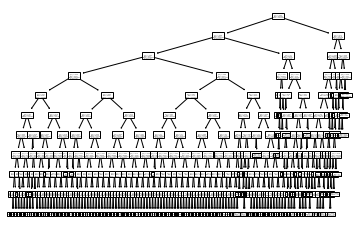

In [38]:
tree.plot_tree(tree_mod)